In [3]:
import warnings 
warnings.filterwarnings("ignore")

In [4]:
import pandas as pd
import numpy as np


In [5]:
bank_df = pd.read_csv("/Users/swethag/Desktop/Upgrad_Data_Science/Python Docs/Self Study From Upgrad/Course_1/Revision/3_EDA_Revision/Bank Dataset/bank_marketing_updated_v1.csv",header = 0)
bank_df.head()

,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


### Data Cleaning

In [6]:
bank_df = pd.read_csv("/Users/swethag/Desktop/Upgrad_Data_Science/Python Docs/Self Study From Upgrad/Course_1/Revision/3_EDA_Revision/Bank Dataset/bank_marketing_updated_v1.csv",header = 0, skiprows= 2)
bank_df.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [7]:
bank_df.dtypes

customerid      int64
age           float64
salary          int64
balance         int64
marital        object
jobedu         object
targeted       object
default        object
housing        object
loan           object
contact        object
day             int64
month          object
duration       object
campaign        int64
pdays           int64
previous        int64
poutcome       object
response       object
dtype: object

In [8]:
bank_df.age.mean()

40.93565090394105

In [10]:
bank_df.drop("customerid", axis = 1, inplace=True)

KeyError: "['customerid'] not found in axis"

In [11]:
bank_df['job'] = bank_df.jobedu.apply(lambda x: x.split(",")[0])

In [12]:
bank_df["education"] = bank_df.jobedu.apply(lambda x: x.split(",")[1])

In [13]:
bank_df.drop("jobedu",axis =1, inplace = True)

In [14]:
bank_df.month.apply(lambda x: x.split(",")[0])

AttributeError: 'float' object has no attribute 'split'

In [15]:
bank_df[bank_df.month.apply(lambda x: isinstance(x,float)) == True].head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
189,31.0,100000,0,single,no,no,yes,no,unknown,5,NaN,562 sec,1,-1,0,unknown,no,management,tertiary
769,39.0,20000,245,married,yes,no,yes,no,unknown,7,NaN,148 sec,3,-1,0,unknown,no,blue-collar,primary
860,33.0,55000,165,married,yes,no,no,no,unknown,7,NaN,111 sec,1,-1,0,unknown,no,retired,secondary
1267,36.0,50000,114,married,yes,no,yes,yes,unknown,8,NaN,147 sec,1,-1,0,unknown,no,admin.,secondary
1685,34.0,20000,457,married,yes,no,yes,no,unknown,9,NaN,266 sec,1,-1,0,unknown,no,blue-collar,secondary


In [16]:
bank_df.isnull().sum()

age          20
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

### Handling Missing values

In [17]:
bank_df.month.value_counts(normalize=True) 

month
may, 2017    0.304400
jul, 2017    0.152521
aug, 2017    0.138172
jun, 2017    0.118133
nov, 2017    0.087863
apr, 2017    0.064901
feb, 2017    0.058590
jan, 2017    0.031044
oct, 2017    0.016342
sep, 2017    0.012754
mar, 2017    0.010540
dec, 2017    0.004739
Name: proportion, dtype: float64

In [18]:
month_node = bank_df.month.mode()[0]
month_node

'may, 2017'

In [19]:
bank_df.month.fillna(month_node,inplace=True)

In [20]:
bank_df.month.value_counts(normalize=True)

month
may, 2017    0.305169
jul, 2017    0.152352
aug, 2017    0.138020
jun, 2017    0.118002
nov, 2017    0.087766
apr, 2017    0.064829
feb, 2017    0.058526
jan, 2017    0.031010
oct, 2017    0.016323
sep, 2017    0.012740
mar, 2017    0.010528
dec, 2017    0.004733
Name: proportion, dtype: float64

In [21]:
bank_df.pdays.describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [22]:
bank_df.loc[bank_df.pdays<0,"pdays"] = np.NaN

In [23]:
bank_df.pdays.describe()

count    8257.000000
mean      224.577692
std       115.344035
min         1.000000
25%       133.000000
50%       194.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

In [24]:
### missing value in response column

bank_df.response.isnull().mean()*100

0.0663555329455221

## Outlier Handling 

In [25]:
# Age variable

bank_df.age.describe()

count    45191.000000
mean        40.935651
std         10.619198
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

<Axes: ylabel='Frequency'>

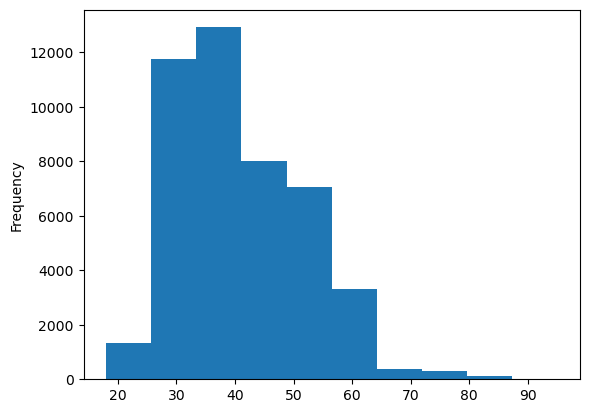

In [26]:
bank_df.age.plot.hist()

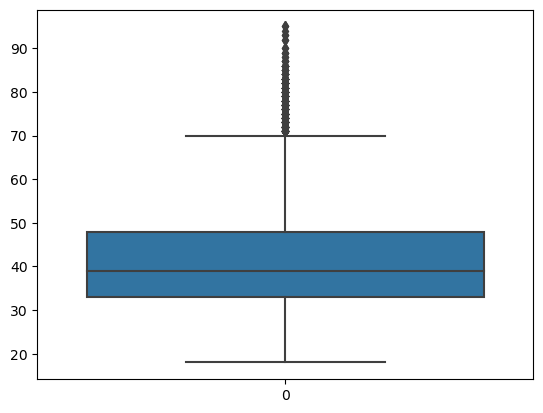

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(bank_df.age)
plt.show()


In [31]:
bank_df.balance.describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

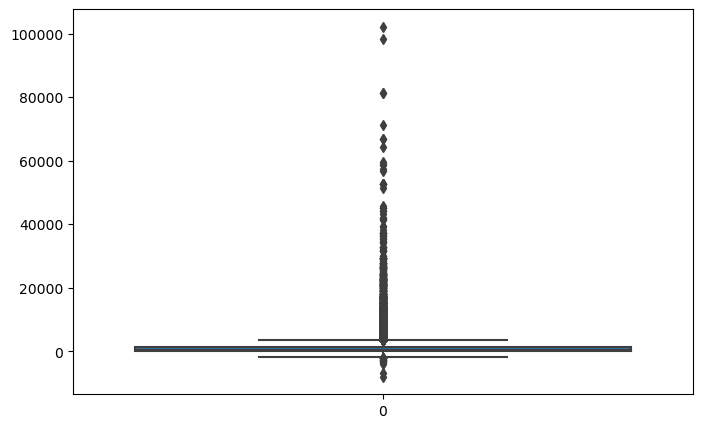

In [34]:
plt.figure(figsize = [8,5])
sns.boxplot(bank_df.balance)
plt.show()

In [35]:
bank_df.balance.quantile([0.5,0.7,0.9,0.95,0.99])

0.50      448.0
0.70     1126.0
0.90     3574.0
0.95     5768.0
0.99    13164.9
Name: balance, dtype: float64

In [37]:
bank_df.salary.describe()

count     45211.000000
mean      57006.171065
std       32085.718415
min           0.000000
25%       20000.000000
50%       60000.000000
75%       70000.000000
max      120000.000000
Name: salary, dtype: float64

In [38]:
bank_df.salary.quantile([0.5,0.75,0.9,0.95,0.99])

0.50     60000.0
0.75     70000.0
0.90    100000.0
0.95    100000.0
0.99    120000.0
Name: salary, dtype: float64

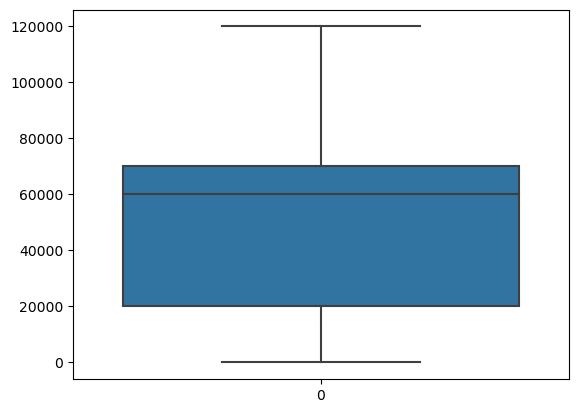

In [40]:
sns.boxplot(bank_df.salary)
plt.show()

In [41]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45191 non-null  float64
 1   salary     45211 non-null  int64  
 2   balance    45211 non-null  int64  
 3   marital    45211 non-null  object 
 4   targeted   45211 non-null  object 
 5   default    45211 non-null  object 
 6   housing    45211 non-null  object 
 7   loan       45211 non-null  object 
 8   contact    45211 non-null  object 
 9   day        45211 non-null  int64  
 10  month      45211 non-null  object 
 11  duration   45211 non-null  object 
 12  campaign   45211 non-null  int64  
 13  pdays      8257 non-null   float64
 14  previous   45211 non-null  int64  
 15  poutcome   45211 non-null  object 
 16  response   45181 non-null  object 
 17  job        45211 non-null  object 
 18  education  45211 non-null  object 
dtypes: float64(2), int64(5), object(12)
memory usa

In [42]:
bank_df.duration.head(10)

0    261 sec
1    151 sec
2     76 sec
3     92 sec
4    198 sec
5    139 sec
6    217 sec
7    380 sec
8     50 sec
9     55 sec
Name: duration, dtype: object

In [43]:
bank_df.duration.describe()

count       45211
unique       2646
top       1.5 min
freq          138
Name: duration, dtype: object

In [67]:
bank_df.duration = bank_df.duration.apply(lambda x: float(x.split()[0])/60  if x.split()[1] == "sec" else float(x.split()[0]))

In [68]:
bank_df.duration.describe()

count    45211.000000
mean         4.302718
std          4.292130
min          0.000000
25%          1.716667
50%          3.000000
75%          5.316667
max         81.966667
Name: duration, dtype: float64